In [252]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

In [253]:
df = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/clean_data/all_neighborhoods_clean.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(5)

,Type,Year built,Heating,Cooling,Parking,HOA,Total Price,Address,Square Feet,New construction,Bedrooms,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,zip,median_nhv2,Parking_Binned,Bathrooms_adj
0,Condo,1910.0,Gas,Central,NaN,No,249900.0,"5329 S Harper Ave #2, Chicago, IL 60615",1000.0,No,2.0,2.0,2.0,Home values in Hyde Park have risen 0.6 % (↑) ...,https://www.zillow.com/homedetails/5329-S-Harp...,0,60615,396553,No,0.0
1,Single Family,1957.0,Forced air,Central,2 spaces,Yes,399000.0,"7144 N Ozark Ave, Chicago, IL 60631",1224.0,No,2.0,2.0,2.0,Home values in Edison Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/7144-N-Ozar...,0,60631,356353,Yes,0.0
2,Condo,2007.0,Forced air,Central,NaN,No,169898.0,"1673 W Farwell Ave APT 1S, Chicago, IL 60626",775.0,No,2.0,1.0,1.0,Home values in Rogers Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/1673-W-Farw...,0,60626,226102,No,0.0
3,Condo,2008.0,Gas,Central,2 spaces,No,489900.0,"1400 S Michigan Ave APT 2203, Chicago, IL 60605",1273.0,No,2.0,2.0,2.0,Home values in South Loop have risen 0.6 % (↑)...,https://www.zillow.com/homedetails/1400-S-Mich...,0,60605,376901,Yes,0.0
4,Single Family,1971.0,Forced air,Central,4 spaces,Yes,389000.0,"10606 S Leavitt St, Chicago, IL 60643",2179.0,No,3.0,3.0,2.0,Home values in Beverly have risen 0.6 % (↑) ov...,https://www.zillow.com/homedetails/10606-S-Lea...,1,60643,346385,Yes,1.0


(array([  9.,  62., 153., 372., 210., 282., 431., 265., 361., 455.]),
 array([1861. , 1876.9, 1892.8, 1908.7, 1924.6, 1940.5, 1956.4, 1972.3,
        1988.2, 2004.1, 2020. ]),
 <BarContainer object of 10 artists>)

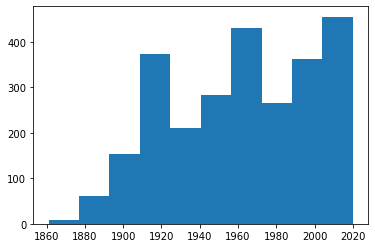

In [254]:
plt.hist(df['Year built'])

In [255]:
bin_labels_5 = [1, 2, 3, 4, 5]
df['year_built_binned'] = pd.qcut(df['Year built'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

In [257]:
df[df['year_built_binned'] == 1]['Year built'].unique()

array([1910., 1897., 1920., 1885., 1902., 1890., 1918., 1895., 1898.,
       1913., 1916., 1922., 1911., 1905., 1900., 1906., 1908., 1921.,
       1901., 1870., 1886., 1892., 1915., 1914., 1887., 1912., 1917.,
       1899., 1919., 1909., 1880., 1891., 1903., 1884., 1893., 1904.,
       1876., 1879., 1888., 1875., 1894., 1896., 1874., 1907., 1889.,
       1867., 1861., 1869., 1868.])

In [258]:
df['year_built_binned']

0       1
1       3
2       5
3       5
4       3
       ..
2595    5
2596    3
2597    3
2598    2
2599    4
Name: year_built_binned, Length: 2600, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [259]:
upper = df['Total Price'].quantile(.02)
lower = df['Total Price'].quantile(.98)
df = df[df['Total Price'].between(upper,lower)].copy()
# df.drop(columns=['zip'],inplace=True)

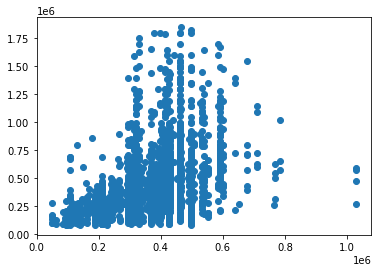

In [260]:
plt.scatter(df['median_nhv2'], df['Total Price'])
plt.show()

In [262]:
df['zip'] = df.zip.astype(str)

In [266]:
continous_data = df.select_dtypes(['float64', 'int64']).copy()
continous_data['year_built_binned'] = df['year_built_binned']

In [267]:
continous_data

,Year built,Total Price,Square Feet,Bedrooms,Bathrooms,Full bathrooms,Half bathrooms,median_nhv2,Bathrooms_adj,year_built_binned
0,1910.0,249900.0,1000.0,2.0,2.0,2.0,0,396553,0.0,1
1,1957.0,399000.0,1224.0,2.0,2.0,2.0,0,356353,0.0,3
2,2007.0,169898.0,775.0,2.0,1.0,1.0,0,226102,0.0,5
3,2008.0,489900.0,1273.0,2.0,2.0,2.0,0,376901,0.0,5
4,1971.0,389000.0,2179.0,3.0,3.0,2.0,1,346385,1.0,3
...,...,...,...,...,...,...,...,...,...,...
2595,2005.0,168999.0,1052.0,1.0,1.0,1.0,0,210544,0.0,5
2596,1973.0,399900.0,3400.0,4.0,3.0,3.0,0,210544,0.0,3
2597,1973.0,94500.0,852.0,2.0,1.0,1.0,0,210544,0.0,3
2598,1949.0,249900.0,1343.0,3.0,2.0,1.0,1,210544,1.0,2


In [268]:
categorical_data = df.select_dtypes(['object']).copy()
categorical_data['year_built_binned'] = df['year_built_binned']

In [269]:
categorical_data.columns.to_list()

['Type',
 'Heating',
 'Cooling',
 'Parking',
 'HOA',
 'Address',
 'New construction',
 'neighborhood_stats',
 'URL',
 'zip',
 'Parking_Binned',
 'year_built_binned']

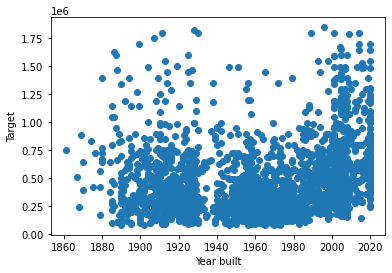

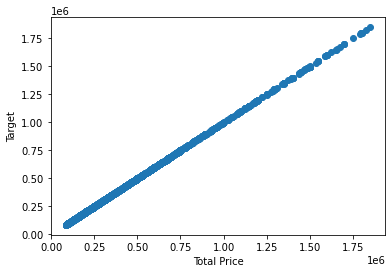

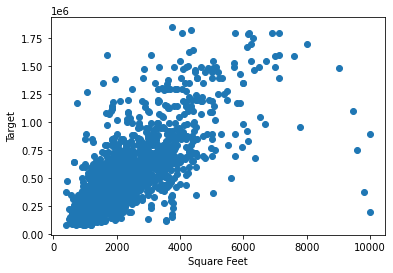

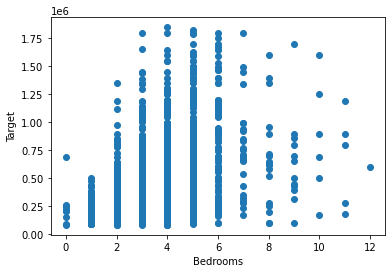

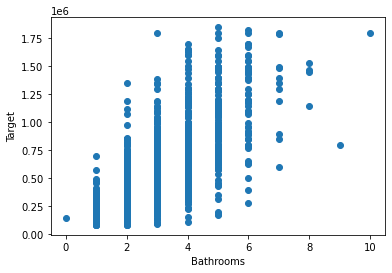

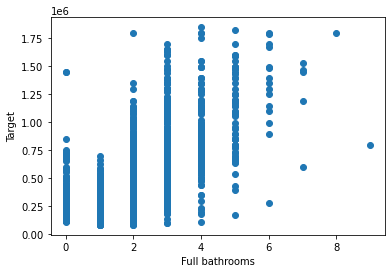

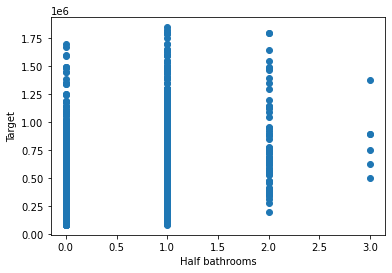

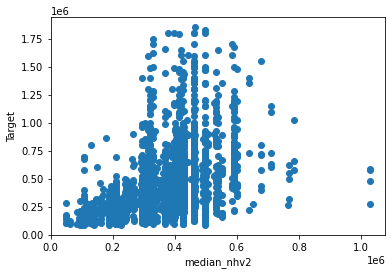

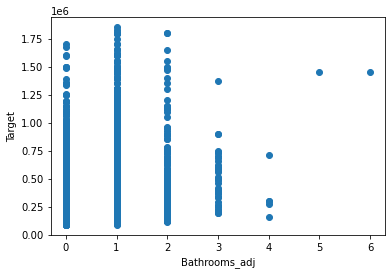

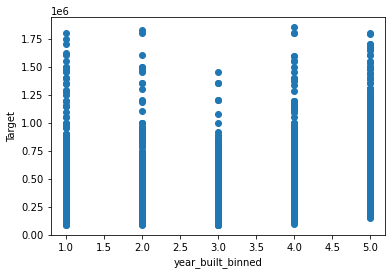

In [270]:
for col in continous_data.columns.to_list():
    plt.scatter(continous_data[col], continous_data['Total Price'])
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.show()

In [272]:
temp_df = pd.get_dummies(categorical_data[['Type',
                                           'Cooling',
                                           'HOA',
                                           'Parking_Binned',
                                           'New construction']], drop_first=True)
temp_df

,Type_Multi Family,Type_Multiple Occupancy,Type_Single Family,Type_Townhouse,Cooling_None,Cooling_Other,Cooling_Refrigeration,Cooling_Wall,HOA_Yes,Parking_Binned_Yes,New construction_ Yes
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2595,0,0,0,0,0,0,0,0,0,1,0
2596,0,0,1,0,0,0,0,0,1,1,0
2597,0,0,0,0,0,0,1,0,0,1,0
2598,0,0,1,0,0,0,0,0,1,1,0


In [275]:
lm_data = continous_data.join(temp_df)
lm_data.isna().sum().sort_values(ascending=False)

Square Feet                348
New construction_ Yes        0
year_built_binned            0
Total Price                  0
Bedrooms                     0
Bathrooms                    0
Full bathrooms               0
Half bathrooms               0
median_nhv2                  0
Bathrooms_adj                0
Type_Multi Family            0
Parking_Binned_Yes           0
Type_Multiple Occupancy      0
Type_Single Family           0
Type_Townhouse               0
Cooling_None                 0
Cooling_Other                0
Cooling_Refrigeration        0
Cooling_Wall                 0
HOA_Yes                      0
Year built                   0
dtype: int64

In [277]:
lm_data

,Year built,Total Price,Square Feet,Bedrooms,Bathrooms,Full bathrooms,Half bathrooms,median_nhv2,Bathrooms_adj,year_built_binned,...,Type_Multiple Occupancy,Type_Single Family,Type_Townhouse,Cooling_None,Cooling_Other,Cooling_Refrigeration,Cooling_Wall,HOA_Yes,Parking_Binned_Yes,New construction_ Yes
0,1910.0,249900.0,1000.0,2.0,2.0,2.0,0,396553,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1957.0,399000.0,1224.0,2.0,2.0,2.0,0,356353,0.0,3,...,0,1,0,0,0,0,0,1,1,0
2,2007.0,169898.0,775.0,2.0,1.0,1.0,0,226102,0.0,5,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,489900.0,1273.0,2.0,2.0,2.0,0,376901,0.0,5,...,0,0,0,0,0,0,0,0,1,0
4,1971.0,389000.0,2179.0,3.0,3.0,2.0,1,346385,1.0,3,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,2005.0,168999.0,1052.0,1.0,1.0,1.0,0,210544,0.0,5,...,0,0,0,0,0,0,0,0,1,0
2596,1973.0,399900.0,3400.0,4.0,3.0,3.0,0,210544,0.0,3,...,0,1,0,0,0,0,0,1,1,0
2597,1973.0,94500.0,852.0,2.0,1.0,1.0,0,210544,0.0,3,...,0,0,0,0,0,1,0,0,1,0
2598,1949.0,249900.0,1343.0,3.0,2.0,1.0,1,210544,1.0,2,...,0,1,0,0,0,0,0,1,1,0


In [278]:
lm_data.dropna(inplace=True)

In [279]:
corrs = lm_data.corr()['Total Price'].sort_values(ascending=False).to_frame().head(50)
corrs

,Total Price
Total Price,1.000000
Bathrooms,0.762452
Square Feet,0.755837
Full bathrooms,0.671800
Bedrooms,0.543381
Half bathrooms,0.437025
median_nhv2,0.435224
Type_Single Family,0.279054
Bathrooms_adj,0.261495
New construction_ Yes,0.250963


In [280]:
features_full = corrs.index.to_list()[1::]
features_full

['Bathrooms',
 'Square Feet',
 'Full bathrooms',
 'Bedrooms',
 'Half bathrooms',
 'median_nhv2',
 'Type_Single Family',
 'Bathrooms_adj',
 'New construction_ Yes',
 'HOA_Yes',
 'Year built',
 'Parking_Binned_Yes',
 'Type_Multiple Occupancy',
 'Type_Multi Family',
 'Type_Townhouse',
 'Cooling_Other',
 'Cooling_Refrigeration',
 'Cooling_Wall',
 'Cooling_None']

In [234]:
# sns.pairplot(test_fixed.iloc[:,0:9])

In [235]:
# plt.scatter(test_fixed['Total Price'], np.log2((test_fixed['median_nhv'])))

In [284]:
cont_features = ['Square Feet',
                 'Bedrooms',
                 'Bathrooms',
                 'Full bathrooms',
                 'Half bathrooms',
                 'median_nhv2',
                 'Bathrooms_adj',
                 'year_built_binned']

In [285]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# continous_clean = continous_data.dropna()

X = lm_data[cont_features]
y = lm_data['Total Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# X = sm.add_constant(X_train)  # We want our model to include a constant value (modeled by the y-intercept)
# Fit model with target as housing price index
lr_m = sm.OLS(y_train, sm.add_constant(X_train))  # Notice that `y` is first here

lr_m = lr_m.fit()

# summarize our model
lr_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     523.6
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:17:55   Log-Likelihood:                -20257.
No. Observations:                1504   AIC:                         4.053e+04
Df Residuals:                    1496   BIC:                         4.057e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.096e+05    2.1e+04    -14.740      0.000   -3.51e+05   -2.68e+05
Square Feet          86.7089      5.820     14.898      0.000      75.293      98.125
Bedrooms           2.121e+04   5307.045      3.996      0.000    1.08e+04    3.16e+04
Bathrooms          6.266e+04   5376.303     11.654      0.000    5.21e+04    7.32e+04
Full bathrooms      3.76e+04   3780.078      9.948      0.000    3.02e+04     4.5e+04
Half bathrooms    -2.749e+04   1.14e+04     -2.415      0.016   -4.98e+04   -5159.988
median_nhv2           0.7555      0.041     18.587      0.000       0.676       0.835
Bathrooms_adj      2.505e+04   5543.804      4.519      0.000    1.42e+04    3.59e+04
year_built_binned  2483.7110   3666.772      0.677      0.498   -4708.849    9676.271
==============================================================================
Omnibus:                      380.640   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1848.558
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       7.961   Cond. No.                     2.43e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.81e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7101623488421138
0.7197523316406483


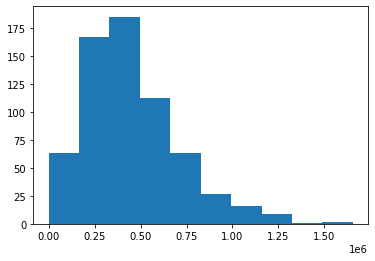

In [287]:
plt.hist(model.predict(X_test), bins=10);

In [288]:
preds = model.predict(X_test)
actuals = y_test

err = abs(preds - actuals)
err.mean()


114779.50570830733

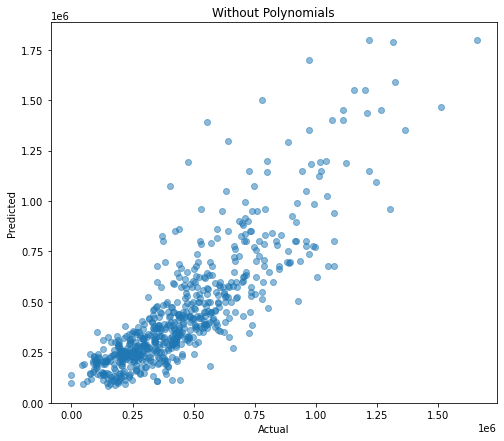

In [289]:

plt.figure(figsize=[8, 7])
plt.title('Without Polynomials')
plt.scatter(model.predict(X_test), y_test, alpha=.5)
plt.xlabel('Actual')
plt.ylabel('Predicted');
plt.savefig('Residuals1.pdf')

In [300]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X = lm_data[features_full]
y = lm_data['Total Price']
poly_x = PolynomialFeatures(2).fit_transform(X)
s = StandardScaler(with_mean=True)
poly_scaled = s.fit_transform(poly_x)

X_train, X_test, y_train, y_test = train_test_split(poly_scaled, y, test_size=0.30, random_state=1)


In [301]:
from sklearn.linear_model import RidgeCV, LassoCV

m = RidgeCV()
m.fit(X_train, y_train)
print('training score',m.score(X_train, y_train))
print('testing score', m.score(X_test, y_test))

training score 0.7969787132731672
testing score 0.7698936650120893


In [302]:
preds = m.predict(X_test)
actuals = y_test
err = abs(preds - actuals)
err.mean()


99373.51107945308

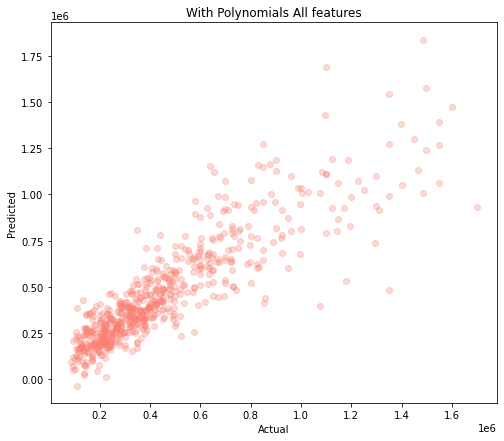

In [303]:
plt.figure(figsize=[8, 7])
plt.title('With Polynomials All features')
plt.scatter(y_test, m.predict(X_test),color='salmon', alpha=.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('Residuals2.pdf')

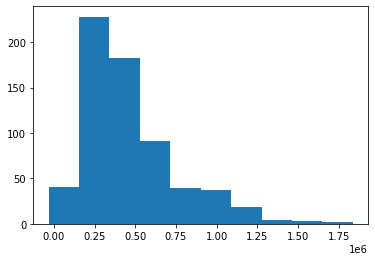

In [304]:
plt.hist(preds, bins=10);

### This is for training a Random Forest Regressor
#### going to format the addresses so we can get gps coordinates for properties

In [43]:
df.Address

0               5329 S Harper Ave #2, Chicago, IL 60615
1                   7144 N Ozark Ave, Chicago, IL 60631
2          1673 W Farwell Ave APT 1S, Chicago, IL 60626
3       1400 S Michigan Ave APT 2203, Chicago, IL 60605
4                 10606 S Leavitt St, Chicago, IL 60643
                             ...                       
2595        9440 S 51st Ave APT 502, Oak Lawn, IL 60453
2596              9246 S Keeler Ave, Oak Lawn, IL 60453
2597         4929 W 87th St APT 3NW, Oak Lawn, IL 60453
2598                 9117 S 53rd Ct, Oak Lawn, IL 60453
2599         4003 W 105th St APT 3W, Oak Lawn, IL 60453
Name: Address, Length: 2497, dtype: object

In [44]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


# model = LinearRegression()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [45]:
# df2 = df.copy()

In [46]:
def clean_address(x):
    if 'UNIT' in x:
        temp = x.split(' UNIT')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif 'APT' in x:
        temp = x.split(' APT')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif '#' in x:
        temp = x.split(' #')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif 'PENTHOUSE' in x:
        temp = x.split(' PENTHOUSE')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif 'SUITE' in x:
        temp = x.split(' SUITE')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    # just return zip code for weird addresses like these so we can still have gps
    # for these properties
#     elif '(Undisclosed Address)' in x:
#         return x.split(' ')[-1]
#     elif 'Floor plan' in x:
#         return x.split(' ')[-1]
#     elif 'Buildable plan' in x:
#         return x.split(' ')[-1]
    else:
        return x

In [47]:
df['address_clean'] = df.Address.apply(clean_address)

In [48]:
from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="geopy/2.0.0")
# location = geolocator.geocode("910 west lake street, chicago il, 60607")

def get_coordinates(x):
    geolocator = Nominatim(user_agent="geopy/2.0.0")
    try:
        location = geolocator.geocode(x)
        if location != None:
            print(list(location[-1]))
            return list(location[-1])
        else:
            print(x)
            return np.nan
    except:
        return np.nan

# going to have to remove apartment numbers before you can do get geo location... 
df['lat-lng'] = df.address_clean.apply(get_coordinates)

# fill na lat-lng values with lat-lng of zip code
mask = df['lat-lng'].isna()
df.loc[mask, 'lat-lng'] = df.loc[mask, 'zip'].apply(get_coordinates)

[41.798760558651544, -87.58896251138316]
[42.0105906, -87.82028962404709]
[42.00624365, -87.67281299358012]
[41.86377655, -87.62454866743403]
[41.700669500000004, -87.67690644999999]
[41.9053114, -87.62553364357132]
[41.8623707, -87.6662151]
[41.915067050000005, -87.7036016427013]
[41.96914686411559, -87.65668639802108]
[41.97169375, -87.77371474874613]
[41.9308798, -87.6401212662577]
[41.9496248, -87.6463764]
[41.9098327, -87.6257175]
[41.8804677, -87.66494085052211]
[42.005519, -87.70856915249365]
[41.94234885, -87.78837995]
[41.991301750000005, -87.65482614125787]
[41.99973835, -87.70053572765963]
[41.741340262336635, -87.73876788528459]
[41.8779241, -87.70503120402208]
[41.9456244, -87.7098029]
[41.89646175, -87.65718906334124]
[41.828017450000004, -87.67057955]
[41.86553025, -87.623088425486]
[41.73526045, -87.71366485080935]
[41.971771000000004, -87.7792153]
[41.7471829, -87.65457951757182]
[41.9604386, -87.6469076]
[41.97865045, -87.67365385137458]
[41.86564755102041, -87.623919

[41.846157000000005, -87.64331227391682]
[41.879202834955876, -87.65306982962066]
[41.9704409, -87.6896851]
[41.9690863, -87.71284617555963]
[41.98836075, -87.78890208939174]
[41.94436055, -87.64962870340133]
[41.758621500000004, -87.55838221253032]
[41.745172, -87.59713674979062]
[41.9299324, -87.70220050045137]
[41.90541185, -87.6304633]
[41.886889, -87.643705]
[41.7751938, -87.68749545083531]
[41.78418710204082, -87.76552106122449]
[41.9649784, -87.7722883]
[41.8397988, -87.70755634149305]
[41.917237681740936, -87.68239913249981]
[41.9292344, -87.65197966019083]
[41.73285265, -87.6028576864324]
[39.738092, -84.248614]
Buildable plan: Modern Farmhouse, The McLean Collection, Chicago, IL 60647
[41.92659005, -87.68693348540846]
[41.881562, -87.74481285798421]
[42.0087944, -87.66662376856134]
[41.918421499999994, -87.64350711830707]
(Undisclosed Address), Chicago, IL 60624
[41.965055500000005, -87.74171149303547]
[41.87796871720369, -87.62413138982897]
[41.86110145, -87.62689260017937]


[41.7835611, -87.5983000535485]
[41.91843475, -87.71391905]
[41.89779525, -87.76343418192118]
[41.93247, -87.658872]
[41.884885249999996, -87.61478426163526]
[41.86076045, -87.65032172635901]
[41.8909503, -87.76020289854134]
[41.9060012, -87.67455612024449]
[41.96368485, -87.66054761619688]
[41.912380137593765, -87.7023910990906]
[41.950575900000004, -87.69057429022796]
[41.7791697, -87.6104823896875]
[41.8944661, -87.66606994735605]
[41.871913449999994, -87.63326225987674]
[41.95259805, -87.64543977143154]
[41.9122607, -87.6383889135164]
[41.9106332, -87.6677584]
[41.9363735, -87.7938077]
[41.719128299999994, -87.59498321012545]
[41.98027275, -87.65446792760869]
[41.879741100000004, -87.66738800364722]
[41.9923619, -87.6554442]
[41.905898300000004, -87.694903860964]
[41.8861098, -87.61983370118045]
[41.8506491, -87.6206291]
[41.777458476634145, -87.79028678050024]
[41.8933498, -87.6500803]
[41.9029564, -87.6317065835326]
[41.780711249999996, -87.72122896398344]
[41.9704409, -87.689685

[41.9733819, -87.667451]
[41.86642115, -87.62997686516064]
[42.0174508, -87.6666915752027]
(Undisclosed Address), Chicago, IL 60638
[41.9115908, -87.7349221]
[42.00425024077593, -87.66823958999495]
[41.80038935, -87.62462706125558]
[41.7431106, -87.6602186]
[41.9514042, -87.80135509735945]
[41.9718261, -87.84067097473523]
[41.9365297, -87.641858]
[41.945596, -87.7292003]
[41.972385349999996, -87.69781600134212]
[41.7582851, -87.57154969701166]
[41.794926849999996, -87.58147866927256]
[41.9871941, -87.7005021]
[41.96285055, -87.75217220437845]
[41.835762700000004, -87.64886759999999]
[41.8833394, -87.6346345]
[41.9654072, -87.7599340749124]
[41.9542062, -87.76736423993981]
[41.74638585, -87.67273620588387]
[41.9447084, -87.7439297]
[41.9075316, -87.72306486949154]
[42.0616805, -87.7234223]
[42.049486849999994, -87.68535875817317]
[42.0314978, -87.6775702]
[42.0299914, -87.6775478]
[42.05047714715276, -87.69883792168348]
[42.0442825, -87.7054961]
[42.0212424, -87.6924186]
[42.0201304, -8

[42.0347601, -87.6865832]
[42.0508873, -87.6828375]
[42.0566642, -87.7142963]
[42.0634877, -87.6967958]
[42.0476162, -87.68238795932774]
[42.0508873, -87.6828375]
[42.0647235, -87.7093318]
[42.04025805, -87.68117544346751]
[42.0640467, -87.7041994]
[42.0403569, -87.6839312]
[42.0341235, -87.6795879]
[42.0216057, -87.6838062]
[42.0560695, -87.7108112]
[42.03779605243861, -87.70554681916825]
[42.03782805112765, -87.70554599868903]
[42.04060105, -87.68104921323587]
[42.07349246491669, -87.8047167803661]
[42.084737000000004, -87.82070774555109]
[42.06123736160839, -87.8020920703751]
[42.06137688141158, -87.80828012362171]
[42.06090537918282, -87.83851226400249]
[42.0959608132795, -87.79901068610742]
[42.075166564719915, -87.84250627261345]
[42.087874177357314, -87.8238553303398]
[42.06824397824478, -87.85998274507246]
[42.076286, -87.849143]
[42.088210057001334, -87.7927653243572]
[42.08748024092136, -87.81462776354162]
[42.061133083126556, -87.81695764483635]
[42.06804950758213, -87.81643

[42.082169, -87.79638049041704]
[42.088403, -87.790458]
[42.09703284850891, -87.84216267660727]
[42.07483100201583, -87.80719873738018]
[42.096748833333336, -87.80217916666666]
[42.061852, -87.8223631486677]
[42.096445, -87.860932]
[42.086722, -87.789093]
[42.06590141712225, -87.84698644961404]
[42.1266708, -87.8584474]
[42.0879070206379, -87.82346662498618]
[42.081966048718385, -87.87361998862772]
2426 Briarford Ln, Northbrook, IL 60062
[42.08017052950672, -87.85032883777978]
[42.06300361769561, -87.79810836140328]
[42.063247989684406, -87.8322756424948]
[42.056812318189316, -87.82565790267482]
[42.06608551698347, -87.86188155166958]
[42.0729535, -87.8200279]
[42.085539557947996, -87.79390584609968]
[42.07722883411353, -87.79848233405764]
139 Julie Dr, Glenview, IL 60025
[42.07243767803872, -87.80720112106444]
[42.0901225, -87.7963009]
[42.079023892204695, -87.80101016866381]
[42.06303891664892, -87.84343538392658]
[42.0987444, -87.8491147]
[42.08424293692721, -87.84200012624486]
[42.

[41.78602106381613, -88.20311312495987]
[41.76992633785579, -88.16675843758303]
[41.74943408163266, -88.18128940816327]
[41.71322073911502, -88.19228374301396]
[41.74357851212778, -88.11908077419504]
[41.78224522222222, -88.14012846464647]
[41.78477197975361, -88.15127507603106]
413 Tupelo Ave, Naperville, IL 60540
[41.75041427272728, -88.19906972727273]
[41.71964003235969, -88.21361976644238]
[41.7067294, -88.2260139]
[41.68791460360685, -88.1842575848672]
[41.7845428631506, -88.15003483316994]
[41.797811, -88.134126]
[41.71659253934209, -88.21208359395192]
5S040 Pebblewood Ln Naperville IL 60563
[41.7450492244898, -88.12361063265307]
2723 Melrose Ct, Naperville, IL 60564
[41.7085234, -88.2088645]
[41.776438142857145, -88.13951069387755]
[41.73463273537433, -88.10249962776305]
5S040 Pebblewood Ln E Naperville IL 60563
Buildable plan: Woodside, Wagner Farms, Naperville, IL 60564
[41.7085234, -88.2088645]
[41.7085234, -88.2088645]
[41.798970265306124, -88.13272734693878]
4431 Monroe Ct 

[41.7967480799209, -88.20913022493878]
[41.758826195979424, -88.1973186219322]
[41.77489049671263, -88.12699310581074]
5S506 Bonnie Ct, Naperville, IL 60563
[41.76992, -88.164813]
[41.721272, -88.148385]
[41.71077667000626, -88.20059396430811]
9S061 Skylane Dr, Naperville, IL 60564
[41.76869054545455, -88.16225]
[41.7544226, -88.1691562]
[41.785757330519694, -88.16392053611287]
[41.764353, -88.117055]
[41.772631494890284, -88.13829036792721]
Buildable plan: Metro, Columbia Park Townes, Naperville, IL 60563
Buildable plan: Castleton, Wagner Farms, Naperville, IL 60564
Buildable plan: The Abbey, DJK Custom Homes of Downtown Naperville, Naperville, IL 60540
1503 Alderleaf Ct, Naperville, IL 60563
[41.88402723293378, -87.80234080461996]
[41.88108290252137, -87.80246317856472]
[41.90580713637701, -87.7950739933763]
[41.8909072, -87.80488319588594]
[41.89282485, -87.80416926591317]
708 Wenonah Ave, Oak Park, IL 60304
[41.88149535850423, -87.80364400562881]
[41.90066424394764, -87.78373396757

[41.88930699351654, -87.79763242914964]
[41.628585, -93.632009]
[41.885286, -87.804168]
[32.37214456818182, -86.29343538636363]
[41.886294, -87.80242433333333]
[32.7195637, -117.1103821]
[41.907515216814254, -87.78718516195778]
[41.89666819800595, -87.7963416562709]
[41.894849049155575, -87.7945712144578]
[41.111919, -80.638546]
[41.892786, -87.8024661209505]
[41.876637, -87.803867]
[41.86784113779534, -87.78538051137957]
[41.900132207619194, -87.80382562893325]
[41.8741659372341, -87.79708339218556]
[41.89353612321124, -87.78148305553442]
[41.885765585693555, -87.79432079959982]
[41.893586327179946, -87.78148452878858]
[41.896514, -87.784827]
[41.88198391836735, -87.77699155102042]
846 Wesley Ave Oak Park IL 60304
[41.87547475649751, -87.78809282761088]
[41.890986749999996, -87.8020975713958]
[41.888449914244184, -87.77807452147603]
[41.881735, -87.787936]
[41.89706763372654, -87.79463036613109]
[41.88595130612245, -87.77495357142857]
[41.88595130612245, -87.77495357142857]
[41.878854

[42.05360846120865, -87.74182631896299]
[42.046913, -87.763896]
[42.06108780161723, -87.76091861088713]
[42.063371203727456, -87.74543167052363]
[42.03733470814448, -87.76032054818272]
[42.05963439630623, -87.76099069907416]
[42.05984202563637, -87.76098040076172]
[42.0489739348632, -87.74582322078106]
[42.007357531443716, -87.75103492470737]
[42.03058358827528, -87.74485438517881]
[42.03445182337594, -87.72905398171575]
9652 N Laramie Ave Skokie IL 60077
[42.02346862778788, -87.74856875615446]
[42.00610903935625, -87.75983916940581]
[42.0195382, -87.7550266]
5101 Jarlath Ave, Skokie, IL 60077
[42.05984202563637, -87.76098040076172]
[42.0191543, -87.7647225]
[42.06096314677446, -87.7287059981421]
8039 Elmwood Ave Skokie IL 60077
[42.05202873102238, -87.73104929322292]
[42.05963439630623, -87.76099069907416]
[42.033592, -87.73309666666667]
[42.04473902131205, -87.75316076757379]
[42.03092343338896, -87.75583637241756]
[42.00874468498371, -87.76113636797861]
[42.04699978313112, -87.72098

5012 29th St, Cicero, IL 60804
[41.85008956762512, -87.77013257811238]
[41.83825184199614, -87.75499074426236]
4001 W 106th Pl, Oak Lawn, IL 60453
[41.727307729237125, -87.7229319894154]
[41.71933757179358, -87.7311577033615]
[41.718113, -87.74869]
6701 W 87th Pl, Oak Lawn, IL 60453
[41.724958, -87.775107]
[41.69964474463155, -87.75124719710776]
5704 W 90th St, Oak Lawn, IL 60453
[41.70562223421024, -87.72101513526454]
[41.719855, -87.7542434]
[41.692668, -87.737486]
[41.7312512, -87.7939058]
[41.718113, -87.74869]
[41.715824063518994, -87.72595966266093]
9440 S 51st Ave Oak Lawn IL 60453
[41.715834, -87.7859084]
[41.7254307, -87.7279454]
[41.71691187496359, -87.78486903577813]
[41.72685648520268, -87.7217289543829]
5644 W 87th Pl, Oak Lawn, IL 60453
[41.72665822347299, -87.78629159322867]
[41.7145578804679, -87.72591662778599]
5840 W 89th Pl, Oak Lawn, IL 60453
[41.72533470583542, -87.72419435144135]
[41.7268757274635, -87.78309215752118]
[41.71274936410633, -87.7333616387766]
5229 W 

In [87]:
# pd.DataFrame(df2['lat-long'].to_list())
df3 = df['lat-lng'].apply(pd.Series)
df3.columns = ['lat', 'long']

In [57]:
# df3['zip'] = df['zip']

In [88]:
tree_df = df3.join(df)
tree_df.drop(columns=['lat-lng', 'Parking', 'Heating'], inplace=True)

In [95]:
tree_cont = tree_df.select_dtypes(['float', 'int'])

In [108]:
# tree_df['year_built_binned']
tree_df_cat = tree_df[['year_built_binned']]
tree_df_cat_enc = pd.get_dummies(tree_df_cat, drop_first=True)

In [111]:
model_data = tree_cont.join(tree_df_cat_enc).dropna().copy()

In [185]:
tree_features = ['lat',
                 'long',
                 'Year built',
                 'Square Feet',
                 'Bedrooms',
                 'Bathrooms',
                 'median_nhv2']
#                  'Bathrooms_adj',
#                  'year_built_binned_semi-old',
#                  'year_built_binned_mid',
#                  'year_built_binned_newer',
#                  'year_built_binned_contemporary']

In [194]:
X = model_data[tree_features]
y = model_data['Total Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [187]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=5, random_state=1)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=1)

In [188]:
regr.score(X_train, y_train)

0.8478982548739261

In [189]:
regr.score(X_test, y_test)

0.7887379176708487

In [190]:
preds = regr.predict(X_test)
actuals = y_test
err = abs(preds - actuals)
err.mean()

94434.21381193446

Text(0, 0.5, 'Predicted')

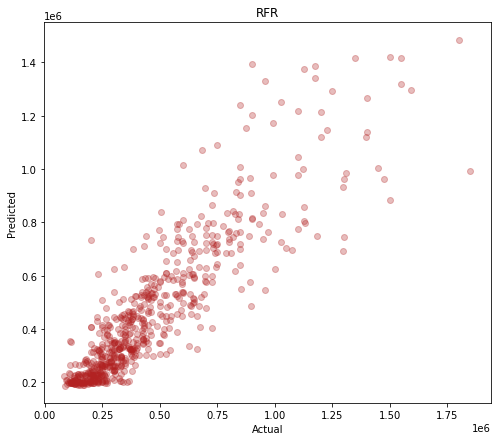

In [191]:
plt.figure(figsize=[8, 7])
plt.title('RFR')
plt.scatter(y_test, regr.predict(X_test),color='firebrick', alpha=.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

rfr = RandomForestRegressor(random_state=0)

max_depth_range = range(1, 11)
leaf_range = range(1, 11)
n_estimators = [50, 100]
max_features = ['auto']

params = dict(max_depth=max_depth_range,
              min_samples_leaf=leaf_range, 
              n_estimators=n_estimators,
              max_features=max_features)

rf_grid = GridSearchCV(rfr,
                       params,
                       cv=5,
                       return_train_score=True,
                       n_jobs=-1)

rf_grid.fit(X_train, y_train)
print("Random Forest score:", rf_grid.best_score_)
print("Random Forest (best parameters)", rf_grid.best_params_)

Random Forest score: 0.7970677734229137
Random Forest (best parameters) {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}


In [195]:
rfr_final = RandomForestRegressor(max_depth=10, min_samples_leaf=1, n_estimators=100)
rfr_final.fit(X_train, y_train)
print('training score', rfr_final.score(X_train, y_train))
print('testing score', rfr_final.score(X_test, y_test))


training score 0.9575698561897412
testing score 0.8369126054116018


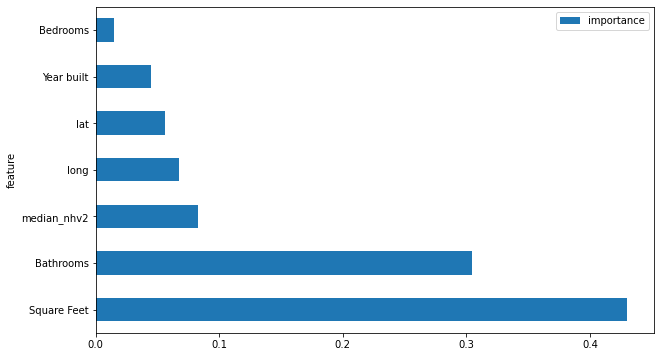

In [196]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = rfr_final.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 6))
plt.savefig('feature_importances.pdf')

In [152]:
# from sklearn import tree

# estimators = rfr_final.estimators_
# plt.figure(figsize=[500, 50])
# tree.plot_tree(estimators[0],filled=True, rounded=True, fontsize=14)
# plt.show()



In [197]:
preds = rfr_final.predict(X_test)
actuals = y_test

err = abs(preds - actuals)
err.mean()


78661.39004709675

Text(0, 0.5, 'Predicted')

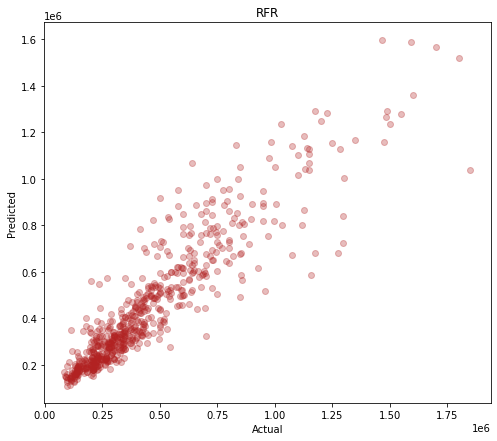

In [198]:
plt.figure(figsize=[8, 7])
plt.title('RFR')
plt.scatter(y_test, rfr_final.predict(X_test),color='firebrick', alpha=.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

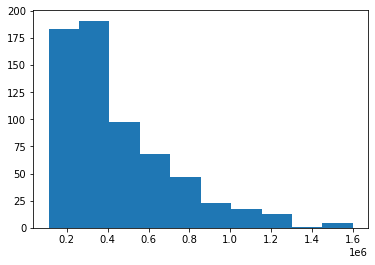

In [199]:
plt.hist(rfr_final.predict(X_test), bins=10);